In [ ]:
**Итого**

| Параметр | clang++ | g++ |
|----------|---------|-----|
| Инстанциация структуры с одним параметром | ~ 32K (99K - 67K) | ~ 55K (113K - 58K) |
| Обращение к инстанциированной структуре | ~ 34K (67K - 33K) | ~ 19K (58K - 39K) |
| Применение constexpr функции | ~ 12K (45K - 33K) | ~ 6K (45K - 39K) |
| Инстанциация шаблонной функции | ~ 52K (98K - 46K) | ~ 36K (93K - 57K) |
| Применение шаблонной constexpr функции | ~ 13K (46K - 33K) | ~ 18K (57K - 39K) |
| Одна глобальная constexpr переменная | ~ 33K | ~39K |
| Одно раскрытие алиаса | 3K-12K в зависимости от контекста | 0-21K|
| Один дополнительный шаблонный параметр в структуре при инстанциации | ~ 4.7K (470K / 100) | ~ 18K (1791K / 100) |
| Один дополнительный шаблонный параметр в структуре при обращении | ~ 4.7K (470K / 100) | ~ 6.8K (679K / 100) |
| Один дополнительный шаблонный параметр в алиасе при первом использовании | ~ 4.7K (470K / 100) | ~ 18K (1791K / 100) |
| Один дополнительный шаблонный параметр в алиасе при повторном использовании | ~ 4.7K (470K / 100) | ~ 6.8K (684K / 100) |
| Объявление шаблонной структуры | ~ 3.7K  | ~ 0.2K |
| Объявление шаблонной функции | ~ 3.2K  | ~ 0.4K |
| Объявление шаблонного алиаса | ~ 3K  | ~ 0.2K |
| Простейшее SFINAE | ~ 77K ((320K - 33K) / 2 - 66K) | ~ 84K ((355K - 39K) / 2 - 74K) |





In [83]:
from collections import namedtuple

Time = namedtuple("Time", ("label", "clang", "gcc"))

def err_tenth(x):
    if x < 0.5:
        return (0, 1)
    return (x * 0.9, x * 1.1)

times = [
    Time("Объявление шаблонного алиаса", err_tenth(3), err_tenth(0.2)),
    Time("Объявление шаблонной функции", err_tenth(3.2), err_tenth(0.4)),
    Time("Объявление шаблонной структуры", err_tenth(4.7), err_tenth(0.2)),
    
    Time("+1 параметр в алиасе при повторном использовании", err_tenth(4.7), err_tenth(6.8)),
    Time("+1 параметр в структуре при обращении", err_tenth(4.7), err_tenth(6.8)),
    
    Time("Применение constexpr функции", err_tenth(12), err_tenth(6)),
    
    Time("+1 параметр в структуре при инстанциации", err_tenth(4.7), err_tenth(18)),
    Time("+1 параметр в алиасе при первом использовании", err_tenth(4.7), err_tenth(18)),
    
    Time("Одно раскрытие алиаса", (3, 12), (0, 21)),
    
    Time("Применение шаблонной constexpr функции", err_tenth(13), err_tenth(18)),
    Time("Обращение к инстанциированной структуре", err_tenth(34), err_tenth(19)),
    
    Time("Одна глобальная constexpr переменная", err_tenth(33), err_tenth(39)),
    
    Time("Инстанциация структуры с одним параметром", err_tenth(32), err_tenth(55)),
    Time("Инстанциация шаблонной функции", err_tenth(52), err_tenth(36)),
    
    Time("Простейшее SFINAE", err_tenth(77), err_tenth(84)),
]

In [84]:
# times = list(sorted(times, key=lambda t: (t.clang[0] + t.gcc[0]) / 2))

In [85]:

np.array([t.clang for t in times])[:, 0]

array([ 2.7 ,  2.88,  4.23,  4.23,  4.23, 10.8 ,  4.23,  4.23,  3.  ,
       11.7 , 30.6 , 29.7 , 28.8 , 46.8 , 69.3 ])

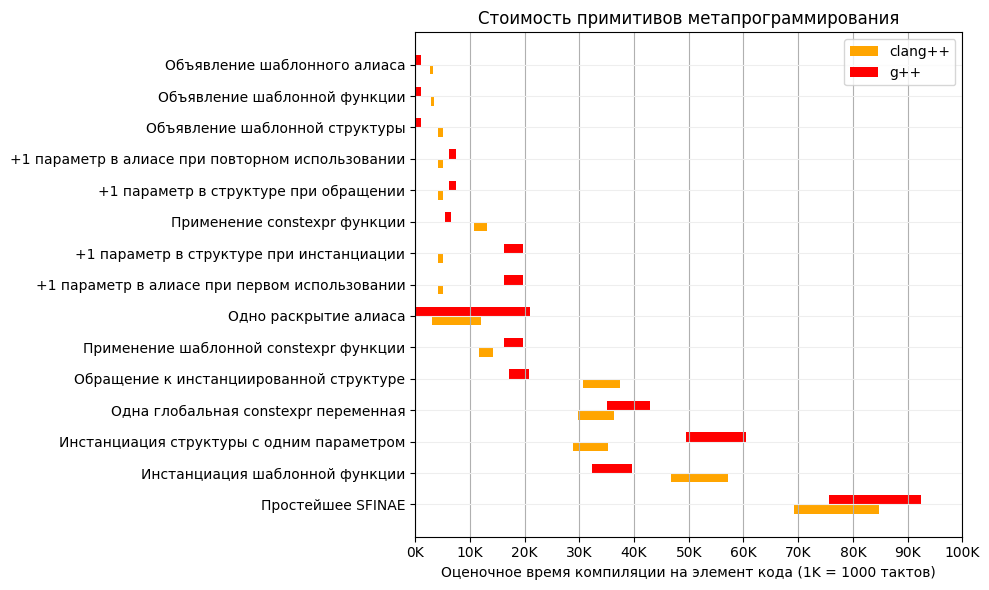

In [97]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcdefaults()
k = 1
fig, ax = plt.subplots(figsize=(10 * k, 6 * k))

y_pos = np.arange(len(times))

clang_left, clang_right = [np.array([t.clang for t in times])[:, d] for d in range(2)]
gcc_left, gcc_right = [np.array([t.gcc for t in times])[:, d] for d in range(2)]

delta = 0.3
ax.barh(y=y_pos + delta/2, width=clang_right - clang_left, left=clang_left, 
        height=delta, align='center', color="orange", label="clang++")
ax.barh(y=y_pos - delta/2, width=gcc_right - gcc_left, left=gcc_left, 
        height=delta, align='center', color="red", label="g++")

ax.set_yticks(y_pos)
ax.set_yticklabels([t.label for t in times])

xticks = np.arange(0, 101, 10)
ax.set_xticks(xticks)
ax.set_xticklabels(["%dK" % tick for tick in xticks])

ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Оценочное время компиляции на элемент кода (1K = 1000 тактов)')
ax.set_title('Стоимость примитивов метапрограммирования')
ax.xaxis.grid(True)
ax.yaxis.grid(True, color="#eeeeee")
plt.xlim(0, None)
plt.legend()

plt.tight_layout()
#plt.subplots_adjust(top=0.88)
plt.savefig("metacost.png")
plt.show()

In [98]:
!git add met